In [11]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import csv
import os
import numpy as np

In [12]:
# path to the client-hello-cipher-suites.csv file
# file_path = '../../../results/attributes/DNS/NEW_dns_transID_response_attributes.csv'
file_path = '../../../results/attributes/DHCP/NEW_dhcp_transID_request_attributes.csv'

# path to the directory to save the plots
final_output_dir = '../../../results/attributes/DHCP/transID_plots'

In [13]:
df = pd.read_csv(file_path, sep='|')
df.tail()

,Device,TransID
5,TribySpeaker,__c768f569__2c479e20__cae32e55__7dbce448
6,AmazonEcho,__ff6b6213__ce146b52__ffce3b55__add6fe3a__c614...
7,WithingsSleepSensor,__970a9b3c__03720622__1c69d336__b3ef773e__85e0...
8,SamsungCamera,__4a98bd77__3ca81e19__ce43d521__68260027__3a87...
9,WithingsBabyMonitor,__3020de0b__8e03ac34


In [14]:
import csv
csv.field_size_limit(10 * 1024 * 1024)

# Read the CSV file and extract data
device_transID = {}
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_transID[device] = transIDs
        # print(f'devicess: {devices}')
            
        #     print(row[0])
        #     qnumber_dicts = row
            # continue

device_transID['AwairAirQuality'] = ['0000']
device_transID['LiFXBulb'] = ['0000']

for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

# # Create a dictionary to store qnumbers for each device
# device_qnumbers = {}
# for i, device_list in enumerate(devices):
#     for j, device in enumerate(device_list):
#         qnumber_dict = qnumber_dicts[i][j]
#         transaction_id = qnumber_dict['transaction id']
#         qnumbers = list(qnumber_dict.keys())
#         qnumbers.remove('transaction id')
        
#         if device not in device_qnumbers:
#             device_qnumbers[device] = []
#         device_qnumbers[device].extend(qnumbers)

# # Print the resulting dictionary
# for device, qnumbers in device_qnumbers.items():
#     print(f"Device: {device}, Qnumbers: {qnumbers}")


key: AwairAirQuality, value: ['0000']
key: LiFXBulb, value: ['0000']
key: PixStarPhotoFrame, value: ['16e8f279', '3ac4f744']
key: RingDoorBell, value: ['1fbfa7c6', 'd2040000']
key: TPLinkCamera, value: ['518ab16e', '8edfca04']
key: TribySpeaker, value: ['c768f569', '2c479e20', 'cae32e55', '7dbce448']
key: AmazonEcho, value: ['ff6b6213', 'ce146b52', 'ffce3b55', 'add6fe3a', 'c6144637', 'b25aee34', '48b3a22d', '7a9b9304', '2ea9c179', '2d56a43b', 'ce1c0272', 'b59dda54']
key: WithingsSleepSensor, value: ['970a9b3c', '03720622', '1c69d336', 'b3ef773e', '85e0780e', '75483768']
key: SamsungCamera, value: ['4a98bd77', '3ca81e19', 'ce43d521', '68260027', '3a87d767', '7b16a523', 'ccb18476', 'bf0c9a65', '03cb1c2d', '6c11541b', 'b260af5e', 'nan', '2e28fe7b', '8a682b03', 'b74e3434', '5bef866a', '41a36046', '336b5637', 'c0cbcb05', '94adbc47', '4718a73f']
key: WithingsBabyMonitor, value: ['3020de0b', '8e03ac34']


## Data Pre-Processing

In [15]:
def hex_to_decimal(hex_number):
    try:
        decimal_number = int(hex_number, 16)
        return decimal_number
    except ValueError:
        raise ValueError("Invalid hexadecimal number")

In [16]:
for device, transID_list in device_transID.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_decimal(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        print(type(dec_val))
        if dec_val == 0:
            new_val = dec_val
        else:
            new_val = math.log2(dec_val)
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    device_transID[device] = sorted(newList)
    # device_transID[device] = newList

device: AwairAirQuality
i: 0, transID: 0000
<class 'int'>
device: LiFXBulb
i: 0, transID: 0000
<class 'int'>
device: PixStarPhotoFrame
i: 0, transID: 16e8f279
<class 'int'>
i: 1, transID: 3ac4f744
<class 'int'>
device: RingDoorBell
i: 0, transID: 1fbfa7c6
<class 'int'>
i: 1, transID: d2040000
<class 'int'>
device: TPLinkCamera
i: 0, transID: 518ab16e
<class 'int'>
i: 1, transID: 8edfca04
<class 'int'>
device: TribySpeaker
i: 0, transID: c768f569
<class 'int'>
i: 1, transID: 2c479e20
<class 'int'>
i: 2, transID: cae32e55
<class 'int'>
i: 3, transID: 7dbce448
<class 'int'>
device: AmazonEcho
i: 0, transID: ff6b6213
<class 'int'>
i: 1, transID: ce146b52
<class 'int'>
i: 2, transID: ffce3b55
<class 'int'>
i: 3, transID: add6fe3a
<class 'int'>
i: 4, transID: c6144637
<class 'int'>
i: 5, transID: b25aee34
<class 'int'>
i: 6, transID: 48b3a22d
<class 'int'>
i: 7, transID: 7a9b9304
<class 'int'>
i: 8, transID: 2ea9c179
<class 'int'>
i: 9, transID: 2d56a43b
<class 'int'>
i: 10, transID: ce1c027

In [17]:
for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

key: AwairAirQuality, value: [0]
key: LiFXBulb, value: [0]
key: PixStarPhotoFrame, value: [384365177, 985986884]
key: RingDoorBell, value: [532654022, 3523477504]
key: TPLinkCamera, value: [1368043886, 2397030916]
key: TribySpeaker, value: [742891040, 2109531208, 3345544553, 3403886165]
key: AmazonEcho, value: [760652859, 782877049, 1219732013, 2057016068, 2916548154, 2992303668, 3047021140, 3323217463, 3457444690, 3457942130, 4285227539, 4291705685]
key: WithingsSleepSensor, value: [57804322, 476697398, 1967667048, 2246080526, 2534054716, 3018815294]
key: SamsungCamera, value: [63642669, 774438523, 862672439, 981981031, 1017650713, 1101226054, 1192798015, 1251523959, 1542424170, 1747320871, 1813074971, 2065081635, 2322082563, 2494413895, 2992680798, 3075355700, 3205274213, 3234581253, 3434185846, 3460551969]
key: WithingsBabyMonitor, value: [807460363, 2382605364]


## Plotting

In [18]:
def plot_list_as_line_plt(lst2D, save_name):
    x_values = 0
    # for i, cs in enumerate(lst2D):
    # if len(cs) <= 1:
        # print(f'case')
        # continue
        # return
    x_values = list(range(len(lst2D)))  # Use list indices as x-axis
    x_values = [x + 1 for x in x_values]
    y_values = lst2D  # Use list items as y-axis
    
    # general config for plots with more than 1 graph
    # if i==0:
    #     linstl = '-'
    #     mkr = 'o'
    #     clr = 'b'
    # if i==1:
    #     linstl = ':'
    #     mkr = '*'
    #     clr = 'y'
        
    # # specific configs for required devices
    # if save_name == 'LiFXBulb':  # LiFXBulb
    #     linstl = '--'
    #     mkr = '^'
    #     clr = 'c'
    # elif save_name == 'TPLinkCamera':  # TPLinkCamera
    #     linstl = '-.'
    #     mkr = 'x'
    #     clr = 'r'

    linstl = '-'
    mkr = '.'
    clr = 'b'
    sss = 2
    
    if save_name == 'AwairAirQuality' or save_name == 'LiFXBulb':
        sss = 20

    # plt.plot(x_values, y_values, marker=mkr, linestyle=linstl, color=clr)
    plt.scatter(x_values, y_values, color=clr, marker=mkr, label='Data Points', s=sss)

    plt.xlabel('Index of the offered list')
    plt.ylabel('Decimal equivalent of the hex code')
    # plt.title('Line Plot from List')
    plt.grid(True)

    x_values = np.array(x_values)
    even_xticks = x_values[x_values % 50 == 0]  # to get the x-axis grid lines
    # plt.xticks(even_xticks)
    
    # if len(x_values) <= 25:
    #     plt.xticks(range(len(x_values)), [int(x) for x in x_values])
    # elif len(x_values) <= 50:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 2 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 75:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 3 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 100:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 5 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)

    plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
    plt.show()

# def plot_list_as_line_sns(lst2D, save_name):
#     x_values = list(range(len(lst)))  # Use list indices as x-axis
#     y_values = lst  # Use list items as y-axis

#     sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.title('Line Plot from List')
#     plt.grid(True)

#     plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
#     plt.show()


IndexError: index 1 is out of bounds for axis 0 with size 1

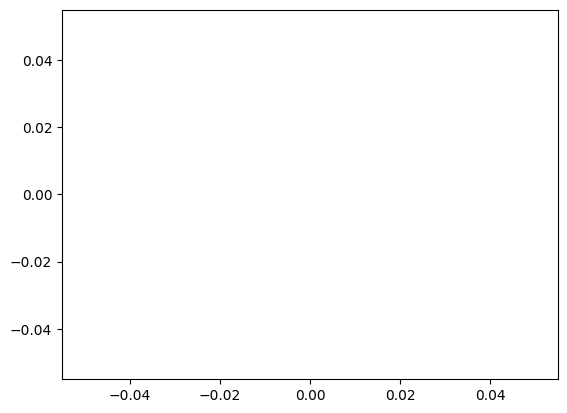

In [20]:
import math
device_g02 = ['TPLinkCamera', 'WithingsSleepSensor', 'WithingsBabyMonitor']
device_g03 = ['PixStarPhotoFrame', 'RingDoorBell', 'TribySpeaker', 'AmazonEcho', 'SamsungCamera']
device_g01 = ['AwairAirQuality', 'LiFXBulb']

binss0 = range(0, 150000, 1000)
binss1 = range(0, int(math.log2(4294967296)) + 1, 1000)
binss2 = range(0, 20000, 500)
binss3 = range(0, 1000, 100)
binss4 = range(0, 100, 1)
# binss4 = range(0, 1, .01)


# x_values = range(0, 18000)

for device, css in device_transID.items():
    x_values = range(1, len(css)+1) # Use list indices as x-axis

    # if device not in device_g01:
    #     continue
    # print(f'css: {css}')
    # print(f'min: {min(css)}, max: {max(css)}')
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    # print(f'device_name: {device_name}')

    clean_data = [math.log2(x) for x in css if x!=0]

    # plt.scatter(x_values, clean_data, label=device, marker='d', s=5)

    n, bins, _ = plt.hist(clean_data, bins=binss1, density=True, alpha=0.7)

    bin_widths = bins[1] - bins[0]

    # Calculate relative frequencies (probabilities) for each bin
    probabilities = n * bin_widths

    plt.bar(bins[:-1], probabilities, width=bin_widths, align='edge', alpha=0.7, label=device)

    # plt.xticks(range(0, 65536, 5000), rotation='vertical')

    # plt.xlabel('Transmit Timestamp (xmt) Intervals (s)')
    # plt.ylabel('Probability: P[xmt = x]')
    # # plt.title('Line Plot from List')
    # plt.grid(True)
    # plt.legend()

    # # plt.savefig(os.path.join(final_output_dir, 'delta_transmit_timestamp.pdf'), format='pdf')  # save
    # print(f'len(css): {len(css)}')
    # plt.show()


    # time.sleep(2)
plt.xticks(range(0, 65536, 5000), rotation='vertical')
plt.xlim(0, 65535)

# plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

plt.xlabel('Transaction ID (dec)')
plt.ylabel('Probability: P[ID = x]')
# plt.title('Line Plot from List')
plt.grid(True)
plt.legend()

plt.savefig(os.path.join(final_output_dir, 'transID_class01.pdf'), format='pdf')  # save
plt.show()



device_name: AwairAirQuality


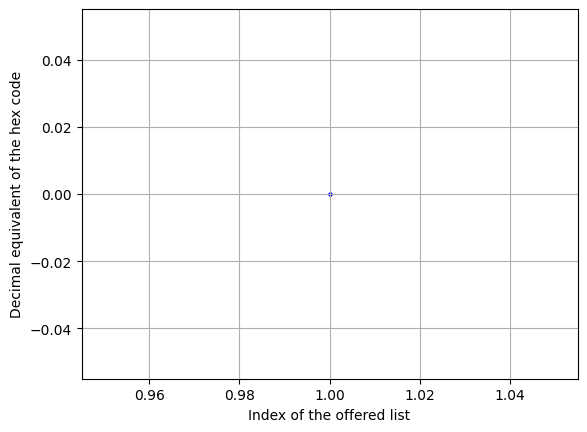

device_name: LiFXBulb


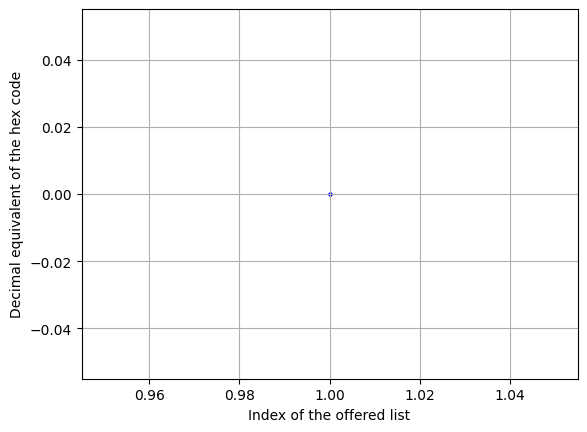

device_name: PixStarPhotoFrame


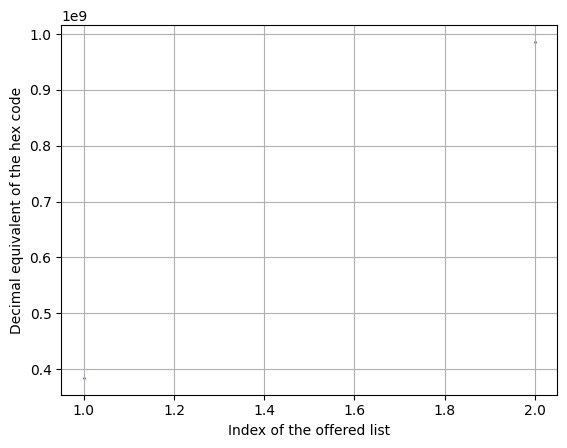

device_name: RingDoorBell


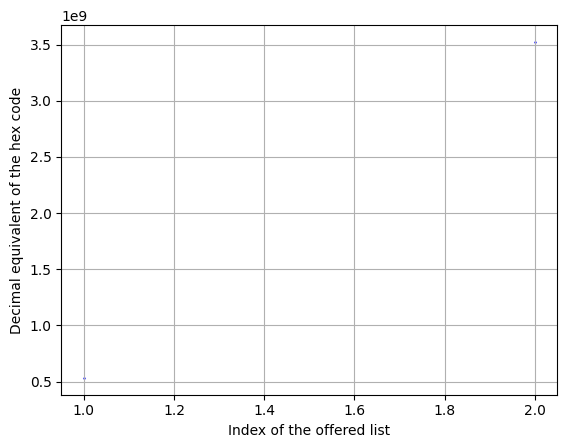

device_name: TPLinkCamera


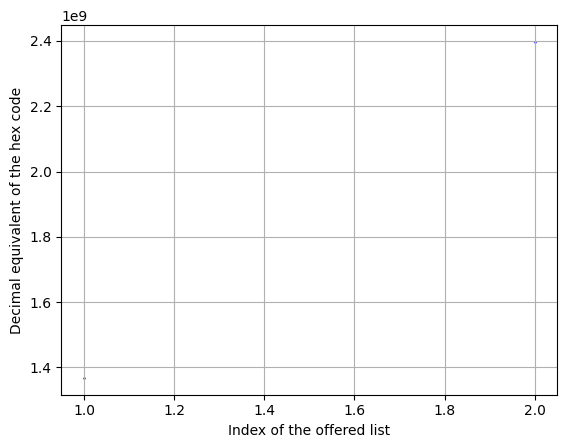

device_name: TribySpeaker


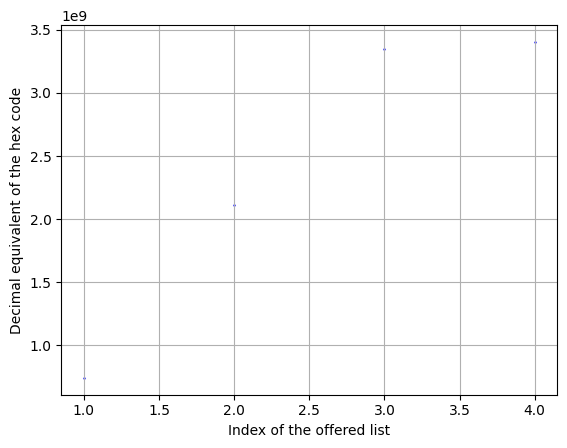

device_name: AmazonEcho


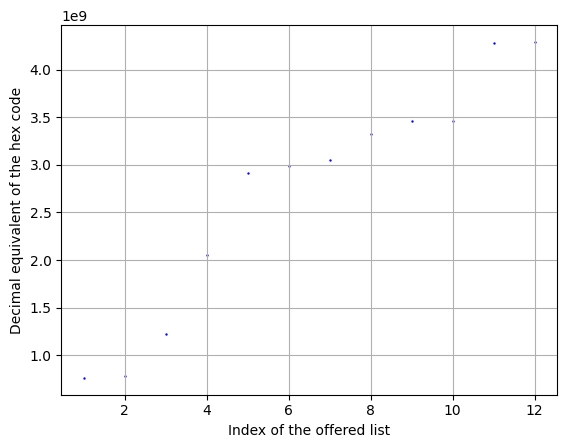

device_name: WithingsSleepSensor


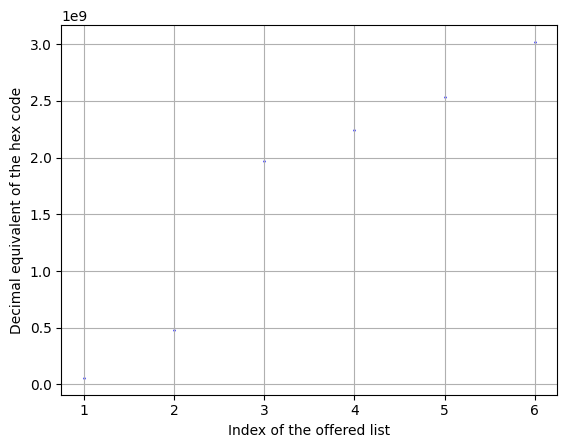

device_name: SamsungCamera


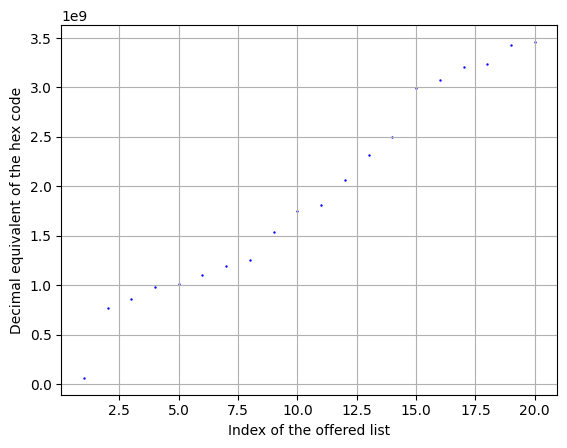

device_name: WithingsBabyMonitor


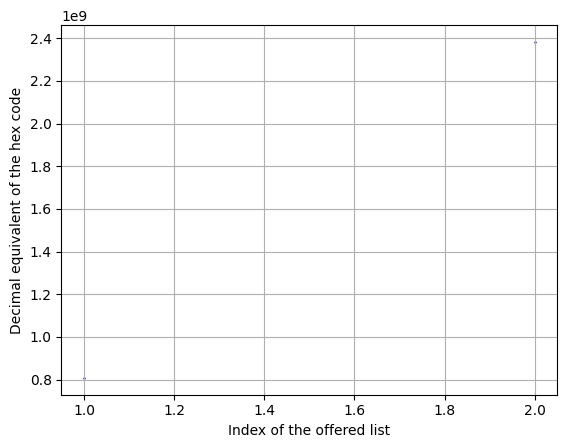

In [ ]:
# plot_list_as_line_plt(dict01['AwairAirQuality'][0])
# plot_list_as_line_sns(dict01['AwairAirQuality'][0])
printed_devices = []
for device, css in device_transID.items():
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    print(f'device_name: {device_name}')
    plot_list_as_line_plt(css, device_name)
    printed_devices.append(device_name)
    # if len(css) < 1:
    #     print(f'device: {device} has 0 ciphersuites')
    #     continue
    # for csi, cs in enumerate(css):
    #     if len(cs) <= 1:
    #         print(f'device: {device}, cs: {csi} has 0 ciphers')
    #         continue
    #     if device_name in printed_devices:
    #         continue
    #     plot_list_as_line_plt(cs, device_name)
    #     printed_devices.append(device_name)